# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this link: [https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/Er0nVreXmihEmtMz5qC5kVIB81-ugSusExPYdcyQTglfLg?e=bNO312]. Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following link: [https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ]. 

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents. 


### 1. Determine if and why ML is an appropriate solution to deploy.

Machine Learning (ML) is appropriate in this scenario because predicting flight delays due to weather involves analyzing large amounts of historical data and detecting complex patterns. Given the variety of factors influencing flight delays, including time of day, season, and specific weather patterns, traditional rule-based methods would struggle to capture all these nuances. ML models, on the other hand, can learn from the historical data and generalize to new scenarios, providing customers with an accurate delay prediction based on real-world conditions. This approach can significantly improve customer experience by allowing travelers to make informed decisions when booking flights.

### 2. Formulate the business problem, success metrics, and desired ML output.

**Business Problem**: The travel booking website aims to improve customer satisfaction by providing real-time delay predictions for flights due to weather conditions. By giving customers insights into potential delays before booking, the website can enhance user trust and experience, reducing dissatisfaction caused by unforeseen delays.

**Success Metrics**:  
- **Prediction Accuracy**: Achieve a high accuracy rate (e.g., 85%+) in predicting delays due to weather.
- **Precision and Recall**: Maintain high precision and recall to ensure that both true delays and non-delays are accurately classified.
- **Customer Satisfaction**: Measured through user feedback and reduction in customer complaints related to unexpected delays.

### 3. Identify the type of ML problem you’re dealing with.

This is a **supervised binary classification** problem. The goal is to classify flights as either "delayed due to weather" or "not delayed" based on labeled historical data. Supervised learning is suitable here since the dataset includes labeled outcomes (delayed/not delayed), allowing the model to learn patterns associated with each class. The binary nature of the classification problem allows for clear, actionable predictions for the customer booking experience.

### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [10]:
import os
from pathlib2 import Path
from zipfile import ZipFile
import time

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# <please add any other library or function you are aiming to import here>


# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features? 

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

In [13]:
# download the files

# <note: make them all relative, absolute path is not accepted>
zip_path = Path('./data_compressed')
base_path = Path('.')
csv_base_path = 'data'

!mkdir {csv_base_path}

In [14]:
# How many zip files do we have? write a code to answer it.
# Count the number of zip files
zip_files = list(base_path.rglob('*.zip'))
zip_file_count = len(zip_files)

print(f"Number of zip files in {base_path}: {zip_file_count}")

Number of zip files in .: 60


#### Extract CSV files from ZIP files

In [16]:
def zip2csv(zipFile_name , file_path):
    """
    Extract csv from zip files
    zipFile_name: name of the zip file
    file_path : name of the folder to store csv
    """

    try:
        with ZipFile(zipFile_name, 'r') as z: 
            print(f'Extracting {zipFile_name} ') 
            z.extractall(path=file_path) 
    except:
        print(f'zip2csv failed for {zipFile_name}')

for file in zip_files:
    zip2csv(file, csv_base_path)

print("Files Extracted")

Extracting data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip 
Extracting data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_10.zip 
Extracting data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_11.zip 
Extracting data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12.zip 
Extracting data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip 
Extracting data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_3.zip 
Extracting data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_4.zip 
Extracting data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_5.zip 
Extracting data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_6.zip 
Extracting data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_7.zip 
Extracting data_c

In [17]:
# Define the relative path to the folder containing the extracted CSV files
csv_base_path = Path('./data')

# Count the number of csv files in the extraction folder
csv_files = list(csv_base_path.rglob('*.csv'))
csv_file_count = len(csv_files)

print(f"Number of csv files extracted: {csv_file_count}")

Number of csv files extracted: 60


Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [19]:
from pathlib import Path
from IPython.display import IFrame
import os

# Define the base path for data folder
csv_base_path = Path('./data')

# Define the path to readme.html within csv_base_path
readme_path = csv_base_path / 'readme.html'

# Display the readme.html file if it exists
if readme_path.exists():
    display(IFrame(src=os.path.relpath(readme_path), width=1000, height=600))
else:
    print("readme.html file not found in the specified path.")


#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [21]:
df_temp = pd.read_csv('data/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv')

**Question**: Print the row and column length in the dataset, and print the column names.

In [23]:
df_shape = df_temp.shape
print(f'Rows and columns in one csv file is {df_shape}')

Rows and columns in one csv file is (585749, 110)


**Question**: Print the first 10 rows of the dataset.  

In [25]:
df_temp.head(10)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2018,3,9,3,1,2018-09-03,9E,20363,9E,N908XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,3,9,9,7,2018-09-09,9E,20363,9E,N315PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,3,9,10,1,2018-09-10,9E,20363,9E,N582CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,3,9,13,4,2018-09-13,9E,20363,9E,N292PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,3,9,14,5,2018-09-14,9E,20363,9E,N600LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018,3,9,16,7,2018-09-16,9E,20363,9E,N316PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018,3,9,17,1,2018-09-17,9E,20363,9E,N916XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018,3,9,20,4,2018-09-20,9E,20363,9E,N371CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018,3,9,21,5,2018-09-21,9E,20363,9E,N601LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018,3,9,23,7,2018-09-23,9E,20363,9E,N906XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [27]:
print(f'The column names are :')
print('#########')
for col in df_temp.columns:
    print(col)

The column names are :
#########
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1

**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not. 

For example: `5 in [1,2,3,4,5]`

In [29]:
# Assuming df is your DataFrame
del_columns = [col for col in df_temp.columns if 'Del' in col]

# Print the columns that contain 'Del'
print("Columns containing 'Del':", del_columns)


Columns containing 'Del': ['DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'DivArrDelay']


In [30]:
df_temp

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2018,3,9,3,1,2018-09-03,9E,20363,9E,N908XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,3,9,9,7,2018-09-09,9E,20363,9E,N315PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,3,9,10,1,2018-09-10,9E,20363,9E,N582CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,3,9,13,4,2018-09-13,9E,20363,9E,N292PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,3,9,14,5,2018-09-14,9E,20363,9E,N600LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585744,2018,3,9,11,2,2018-09-11,WN,19393,WN,N923WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
585745,2018,3,9,11,2,2018-09-11,WN,19393,WN,N7876A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
585746,2018,3,9,11,2,2018-09-11,WN,19393,WN,N271LV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
585747,2018,3,9,11,2,2018-09-11,WN,19393,WN,N265WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [32]:
# Print the number of rows and columns
print("The #rows and #columns are ", df_temp.shape[0], " and ", df_temp.shape[1])

# Print the unique years in the dataset
print("The years in this dataset are: ", df_temp['Year'].unique())

# Print the unique months covered in the dataset
print("The months covered in this dataset are: ", df_temp['Month'].unique())

# Print the date range for the data (assuming the 'FlightDate' column exists and is in datetime format)
print("The date range for data is:", min(df_temp['FlightDate']), " to ", max(df_temp['FlightDate']))

# Print the unique airlines covered in the dataset (using 'Reporting_Airline' as the airline identifier)
print("The airlines covered in this dataset are: ", list(df_temp['Reporting_Airline'].unique()))

# Print the unique origin airports covered in the dataset
print("The Origin airports covered are: ", list(df_temp['Origin'].unique()))

# Print the unique destination airports covered in the dataset
print("The Destination airports covered are: ", list(df_temp['Dest'].unique()))


The #rows and #columns are  585749  and  110
The years in this dataset are:  [2018]
The months covered in this dataset are:  [9]
The date range for data is: 2018-09-01  to  2018-09-30
The airlines covered in this dataset are:  ['9E', 'B6', 'WN', 'YV', 'YX', 'EV', 'AA', 'AS', 'DL', 'HA', 'UA', 'F9', 'G4', 'MQ', 'NK', 'OH', 'OO']
The Origin airports covered are:  ['DFW', 'LGA', 'MSN', 'MSP', 'ATL', 'BDL', 'VLD', 'JFK', 'RDU', 'CHS', 'DTW', 'GRB', 'PVD', 'SHV', 'FNT', 'PIT', 'RIC', 'RST', 'RSW', 'CVG', 'LIT', 'ORD', 'JAX', 'TRI', 'BOS', 'CWA', 'DCA', 'CHO', 'AVP', 'IND', 'GRR', 'BTR', 'MEM', 'TUL', 'CLE', 'STL', 'BTV', 'OMA', 'MGM', 'TVC', 'SAV', 'GSP', 'EWR', 'OAJ', 'BNA', 'MCI', 'TLH', 'ROC', 'LEX', 'PWM', 'BUF', 'AGS', 'CLT', 'GSO', 'BWI', 'SAT', 'PHL', 'TYS', 'ACK', 'DSM', 'GNV', 'AVL', 'BGR', 'MHT', 'ILM', 'MOT', 'IAH', 'SBN', 'SYR', 'ORF', 'MKE', 'XNA', 'MSY', 'PBI', 'ABE', 'HPN', 'EVV', 'ALB', 'LNK', 'AUS', 'PHF', 'CHA', 'GTR', 'BMI', 'BQK', 'CID', 'CAK', 'ATW', 'ABY', 'CAE', 'SRQ'

**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [34]:
counts = pd.DataFrame({'Origin':df_temp['Origin'].value_counts(), 'Destination':df_temp['Dest'].value_counts()})
counts

,Origin,Destination
ABE,303,303
ABI,169,169
ABQ,2077,2076
ABR,60,60
ABY,79,79
...,...,...
WRG,60,60
WYS,52,52
XNA,1004,1004
YAK,60,60


**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [36]:
counts.sort_values(by='Origin',ascending=False).head(15 )# Enter your code here

,Origin,Destination
ATL,31525,31521
ORD,28257,28250
DFW,22802,22795
DEN,19807,19807
CLT,19655,19654
LAX,17875,17873
SFO,14332,14348
IAH,14210,14203
LGA,13850,13850
MSP,13349,13347


In [37]:
counts.sort_values(by='Destination',ascending=False).head(15 )# Enter your code here

,Origin,Destination
ATL,31525,31521
ORD,28257,28250
DFW,22802,22795
DEN,19807,19807
CLT,19655,19654
LAX,17875,17873
SFO,14332,14348
IAH,14210,14203
LGA,13850,13850
MSP,13349,13347


Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe 

In [115]:
def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name):
    """
    Combine csv files into one Data Frame
    csv_files: list of csv file paths
    filter_cols: list of columns to filter
    subset_cols: list of columns to subset rows
    subset_vals: list of list of values to subset rows
    """
    # Create an empty datafram
    df = pd.DataFrame()

    # loop through CSV files
    for files in csv_files:
        # Read the csv file into dataframe
        df1 = pd.read_csv(files)
        # Filter the columns
        df1 = df1[filter_cols]

        #Apply subset filter using subset_cols and subset_vals
        for cols, vals in zip(subset_cols, subset_vals):
            df1 = df1[df1[cols].isin(vals)]

        # Concatenate the filtered DataFrame with the combined DataFrame
        df = pd.concat([df, df1], ignore_index=True)
    
    # Save the combined DataFrame to a CSV file if required
    df.to_csv(file_name, index=False)
    print(f"Combined data saved to {file_name}")
    
    return df

In [117]:
#cols is the list of columns to predict Arrival Delay 
cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
        'Reporting_Airline','Origin','OriginState','Dest','DestState',
        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',
        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']

subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

# subset_vals is a list collection of the top origin and destination airports and top 5 airlines
subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['UA', 'OO', 'WN', 'AA', 'DL']]

Use the function above to merge all the different files into a single file that you can read easily. 

**Note**: This will take 5-7 minutes to complete.

In [120]:
start = time.time()

csv_files = list(csv_base_path.glob('*.csv'))

combined_csv_filename = f"{base_path}combined_files.csv"

combined_df = combine_csv(csv_files, cols, subset_cols, subset_vals, combined_csv_filename)

print(f'csv\'s merged in {round((time.time() - start)/60,2)} minutes')

Combined data saved to .combined_files.csv
csv's merged in 2.46 minutes


#### Load dataset

Load the combined dataset.

In [1441]:
data = pd.read_csv('.combined_files.csv')

Print the first 5 records.

In [1443]:
data.head(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,ArrDel15,AirTime
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,TX,2145,0.0,0.0,689.0,3,-20.0,0.0,0.0,99.0
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,GA,945,0.0,0.0,731.0,3,-3.0,0.0,0.0,98.0
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,CO,1855,0.0,0.0,1199.0,5,-7.0,0.0,0.0,174.0
3,2014,1,1,26,7,2014-01-26,DL,ATL,GA,PHX,AZ,1634,0.0,0.0,1587.0,7,-4.0,0.0,0.0,233.0
4,2014,1,1,26,7,2014-01-26,DL,PHX,AZ,ATL,GA,700,0.0,0.0,1587.0,7,-13.0,0.0,0.0,179.0


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [1445]:
# Print the number of rows and columns
print("The #rows and #columns are ", combined_df.shape[0], " and ", combined_df.shape[1])

# Print the unique years in the dataset
print("The years in this dataset are: ", list(combined_df['Year'].unique()))

# Print the unique months covered in the dataset, sorted for easier readability
print("The months covered in this dataset are: ", sorted(list(combined_df['Month'].unique())))

# Print the date range for the data, assuming 'FlightDate' is already in datetime format
print("The date range for data is:", min(combined_df['FlightDate']), " to ", max(combined_df['FlightDate']))

# Print the unique airlines covered in the dataset
print("The airlines covered in this dataset are: ", list(combined_df['Reporting_Airline'].unique()))

# Print the unique origin airports covered in the dataset
print("The Origin airports covered are: ", list(combined_df['Origin'].unique()))

# Print the unique destination airports covered in the dataset
print("The Destination airports covered are: ", list(combined_df['Dest'].unique()))


The #rows and #columns are  1658130  and  20
The years in this dataset are:  [2014, 2015, 2016, 2017, 2018]
The months covered in this dataset are:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
The date range for data is: 2014-01-01  to  2018-12-31
The airlines covered in this dataset are:  ['DL', 'OO', 'WN', 'UA', 'AA']
The Origin airports covered are:  ['ATL', 'DFW', 'PHX', 'DEN', 'IAH', 'CLT', 'SFO', 'LAX', 'ORD']
The Destination airports covered are:  ['IAH', 'ATL', 'DEN', 'PHX', 'CLT', 'LAX', 'DFW', 'SFO', 'ORD']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [1447]:
data.rename(columns={'ArrDel15': 'is_delay'}, inplace=True)

Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [1449]:
# Check for null values in each column
null_counts = data.isnull().sum(axis=0)

# Print the columns with their respective null counts
print("Null values across columns:\n", null_counts)


Null values across columns:
 Year                     0
Quarter                  0
Month                    0
DayofMonth               0
DayOfWeek                0
FlightDate               0
Reporting_Airline        0
Origin                   0
OriginState              0
Dest                     0
DestState                0
CRSDepTime               0
Cancelled                0
Diverted                 0
Distance                 0
DistanceGroup            0
ArrDelay             22540
ArrDelayMinutes      22540
is_delay             22540
AirTime              22540
dtype: int64


The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

In [1451]:
### Remove null columns
# Remove rows with missing values in specified columns
data = data[~data['ArrDelay'].isnull() & ~data['ArrDelayMinutes'].isnull() & ~data['is_delay'].isnull() & ~data['AirTime'].isnull()]

# Confirm the number of rows after removing null values
print("Rows after removing null values:", data.shape[0])


Rows after removing null values: 1635590


Get the hour of the day in 24-hour time format from CRSDepTime.

In [1453]:
data['DepHourofDay'] = data['CRSDepTime'] // 100

In [1454]:
data_orig.head(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,...,DepHourofDay,is_holiday,AWND_O,PRCP_O,SNOW_O,TAVG_O,AWND_D,PRCP_D,SNOW_D,TAVG_D
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,...,21,0,33,0,0.0,54.0,30,0,0.0,130.0
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,...,9,0,39,0,0.0,136.0,33,0,0.0,54.0
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,...,18,0,33,0,0.0,54.0,77,0,0.0,68.0
3,2014,1,1,26,7,2014-01-26,DL,ATL,GA,PHX,...,16,0,33,0,0.0,54.0,20,0,0.0,165.0
4,2014,1,1,26,7,2014-01-26,DL,PHX,AZ,ATL,...,7,0,20,0,0.0,165.0,33,0,0.0,54.0


## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm. 

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

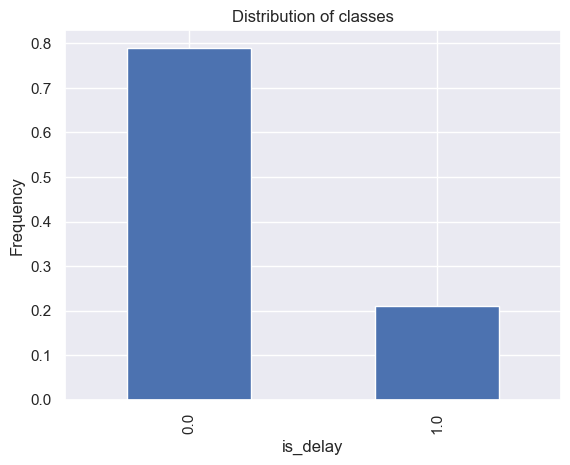

In [1457]:
(data.groupby('is_delay').size()/len(data) ).plot(kind='bar')# Enter your code here
plt.ylabel('Frequency')
plt.title('Distribution of classes')
plt.show()

**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

Class Imbalance: The plot shows a significant imbalance between the two classes. The majority of flights fall into the "no delay" category (is_delay = 0), while only a smaller proportion of flights are delayed more than 15 minutes (is_delay = 1).

**Questions**: 

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

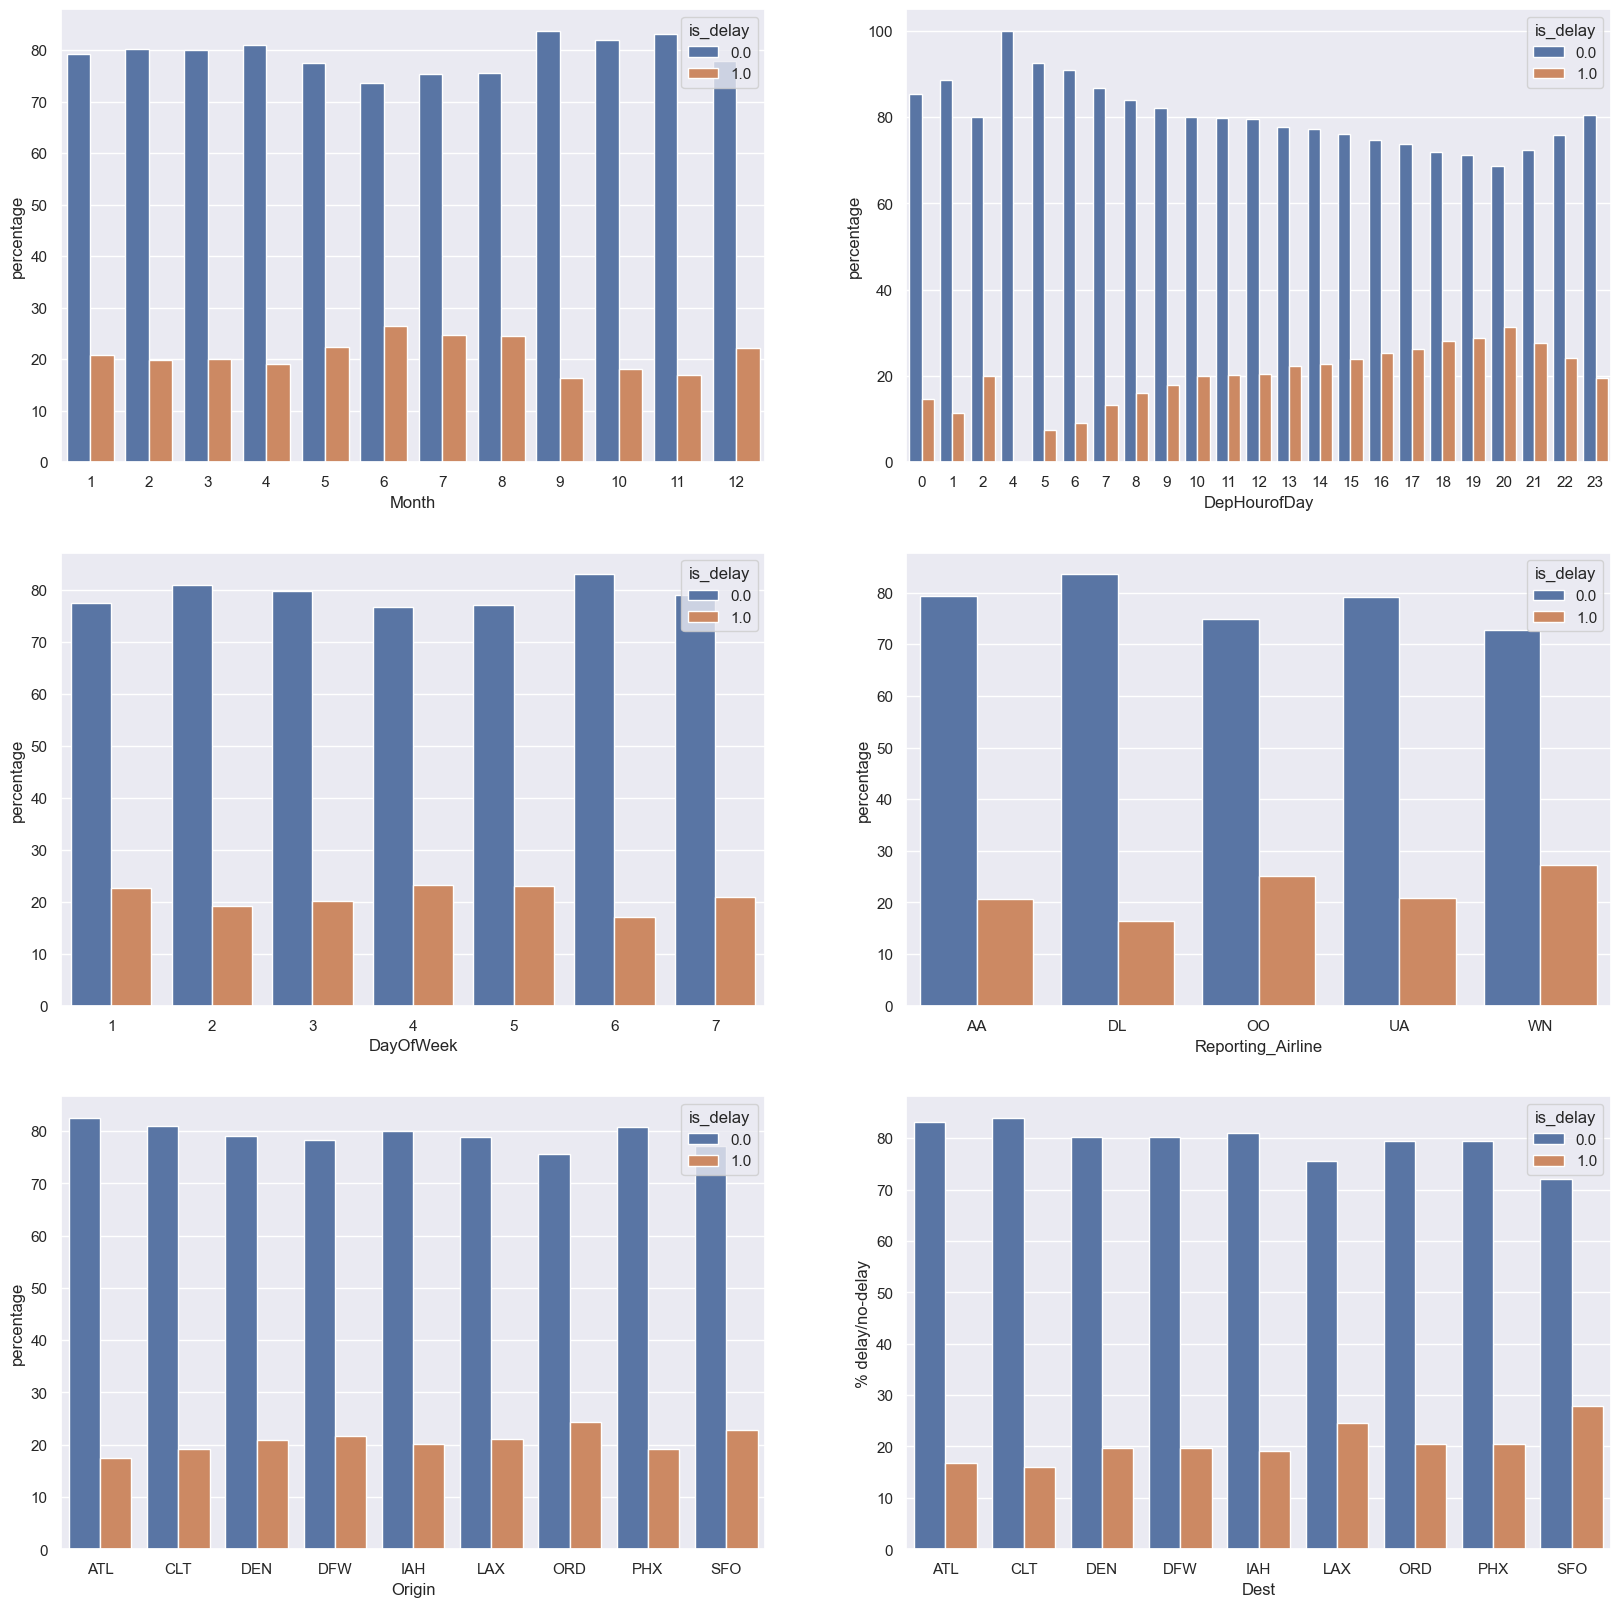

In [1461]:
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = data.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')
    

plt.show()

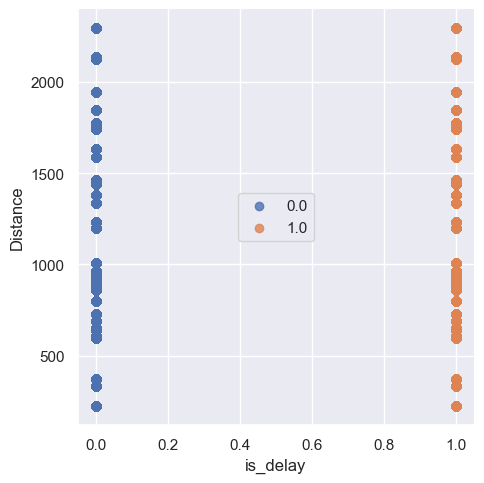

In [1462]:
sns.lmplot( x="is_delay", y="Distance", data=data, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()

### Features

Look at all the columns and what their specific types are.

In [1465]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay'],
      dtype='object')

In [1466]:
data.dtypes

Year                   int64
Quarter                int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
FlightDate            object
Reporting_Airline     object
Origin                object
OriginState           object
Dest                  object
DestState             object
CRSDepTime             int64
Cancelled            float64
Diverted             float64
Distance             float64
DistanceGroup          int64
ArrDelay             float64
ArrDelayMinutes      float64
is_delay             float64
AirTime              float64
DepHourofDay           int64
dtype: object

Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [1468]:
data_orig = data.copy()
data = data[[ 'is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay']]


# Bucketize DepHourofDay into time-of-day categories
def bucketize_hour(hour):
    if 0 <= hour <= 5:
        return 'Early Morning'
    elif 6 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 17:
        return 'Afternoon'
    elif 18 <= hour <= 23:
        return 'Evening'

# Apply the bucket function to DepHourofDay
data['DepHourofDay_Bucket'] = data['DepHourofDay'].apply(bucketize_hour)

# Drop the original DepHourofDay column
data = data.drop('DepHourofDay', axis=1)

# Convert the new bucketed column to a category
data['DepHourofDay_Bucket'] = data['DepHourofDay_Bucket'].astype('category')

categorical_columns  = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','DepHourofDay_Bucket']
for c in categorical_columns:
    data[c] = data[c].astype('category')

# Preview the data
data.head()

,is_delay,Quarter,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,Dest,Distance,DepHourofDay_Bucket
0,0.0,1,1,26,7,DL,ATL,IAH,689.0,Evening
1,0.0,1,1,26,7,DL,DFW,ATL,731.0,Morning
2,0.0,1,1,26,7,DL,ATL,DEN,1199.0,Evening
3,0.0,1,1,26,7,DL,ATL,PHX,1587.0,Afternoon
4,0.0,1,1,26,7,DL,PHX,ATL,1587.0,Morning


In [1469]:
data.dtypes

is_delay                float64
Quarter                category
Month                  category
DayofMonth             category
DayOfWeek              category
Reporting_Airline      category
Origin                 category
Dest                   category
Distance                float64
DepHourofDay_Bucket    category
dtype: object

To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [1471]:
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)
data_dummies = data_dummies.replace({True: 1, False: 0})
data = pd.concat([data, data_dummies], axis=1)
data.drop(categorical_columns, axis=1, inplace=True)

In [1472]:
data

,is_delay,Distance,Quarter_2,Quarter_3,Quarter_4,Month_2,Month_3,Month_4,Month_5,Month_6,...,Dest_DEN,Dest_DFW,Dest_IAH,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO,DepHourofDay_Bucket_Early Morning,DepHourofDay_Bucket_Evening,DepHourofDay_Bucket_Morning
0,0.0,689.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0.0,731.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.0,1199.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0.0,1587.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,1587.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658125,0.0,602.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1658126,0.0,967.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1658127,1.0,967.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1658128,0.0,967.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


Check the length of the dataset and the new columnms.

In [1474]:
print("Number of rows:", data.shape[0])

Number of rows: 1635590


In [1475]:
print("Number of columns:", data.shape[1])
print("Columns in the dataset:\n", data.columns.tolist())

Number of columns: 75
Columns in the dataset:
 ['is_delay', 'Distance', 'Quarter_2', 'Quarter_3', 'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5', 'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9', 'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13', 'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17', 'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21', 'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25', 'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29', 'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA', 'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW', 'Origin_IAH', 'Origin_LAX', 'Origin

**Sample Answer:** 
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

In [1477]:
data.dtypes

is_delay                             float64
Distance                             float64
Quarter_2                              int64
Quarter_3                              int64
Quarter_4                              int64
                                      ...   
Dest_PHX                               int64
Dest_SFO                               int64
DepHourofDay_Bucket_Early Morning      int64
DepHourofDay_Bucket_Evening            int64
DepHourofDay_Bucket_Morning            int64
Length: 75, dtype: object

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [1479]:
data.rename(columns={'is_delay': 'target'}, inplace=True)

In [1480]:
data.to_csv("combined_csv_v1.csv", index=False)
print("File 'combined_csv_v1.csv' has been saved successfully.")

File 'combined_csv_v1.csv' has been saved successfully.


# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


### Train test split

In [1483]:
from sklearn.model_selection import train_test_split
# Split the data into features (X) and target (y)
X = data.drop('target', axis=1)  # Drop target column from features
y = data['target']  # Target column
# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Baseline classification model

In [1485]:
# Baseline classification model: Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()  # Increased iterations for convergence
model.fit(X_train, y_train)

LogisticRegression()

In [1486]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression Model: {accuracy:.2f}")

# Detailed classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy of Logistic Regression Model: 0.79
Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      1.00      0.88    258234
         1.0       0.55      0.00      0.01     68884

    accuracy                           0.79    327118
   macro avg       0.67      0.50      0.44    327118
weighted avg       0.74      0.79      0.70    327118

Confusion Matrix:
 [[258072    162]
 [ 68689    195]]


## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

In [1489]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_labels, target_predicted):
    # Generate confusion matrix
    cm = confusion_matrix(test_labels, target_predicted)
    
    # Plotting the matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['No Delay', 'Delay'],
                yticklabels=['No Delay', 'Delay'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

In [1490]:
from sklearn import metrics

def plot_roc(test_labels, target_predicted_probs):
    # Compute ROC curve and AUC score
    fpr, tpr, thresholds = metrics.roc_curve(test_labels, target_predicted_probs)
    auc_score = metrics.roc_auc_score(test_labels, target_predicted_probs)
    
    # Plotting the ROC curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.show()

In [1491]:
y_pred = model.predict(X_test)
y_pred_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (delay)

To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

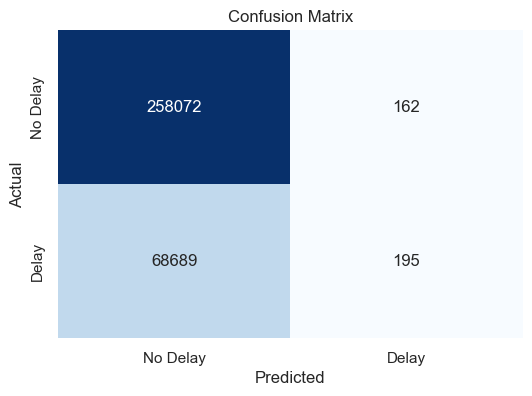

In [1493]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

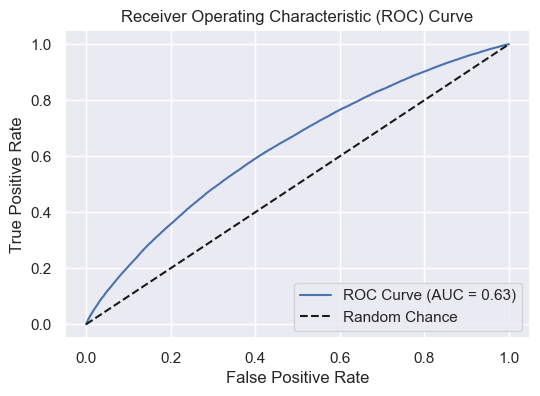

In [1495]:
plot_roc(y_test, y_pred_probs)

In [1496]:
# Print Evaluation Statistics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
sensitivity = recall  # Sensitivity is equivalent to recall in binary classification

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

Accuracy: 0.79
Precision: 0.55
Recall (Sensitivity): 0.00
Specificity: 1.00


### Key questions to consider:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison? 

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)? 

Use the cells below to answer these and other questions. Insert and delete cells where needed.


**Question**: What can you summarize from the confusion matrix?


1. **Model Performance on Test Set vs. Training Set**  
   If the model’s performance on the test set is notably lower than on the training set, it suggests overfitting. Overfitting occurs when a model learns the noise in the training data rather than general patterns, resulting in poor generalization to new data (the test set). In this case, the model seems to have a relatively low AUC of 0.63 on the test set, indicating that it has limited predictive ability. This difference between training and test performance could be addressed by regularization, reducing model complexity, or improving feature selection.

2. **Differences Between Accuracy, Precision, and Recall**  
   From the confusion matrix:
   - **Accuracy**: Likely high, dominated by the large number of correctly classified "No Delay" instances. However, accuracy can be misleading in imbalanced datasets.
   - **Precision**: Likely low, especially for "Delay" predictions, given the high number of false positives (incorrect "No Delay" classified as "Delay").
   - **Recall**: Low for the "Delay" class, as the model misses many actual delayed flights (high false negatives).

   These differences occur due to class imbalance: the dataset has many more "No Delay" instances than "Delay" instances. This imbalance leads to high accuracy but low recall for the "Delay" class, which is often more important for predicting rare events.

3. **Business Implications and Metric Sufficiency**  
   For a business focused on alerting customers about potential delays, recall for the "Delay" class is crucial. Missing delays (false negatives) could lead to dissatisfied customers. The current model's recall and precision are likely insufficient for this purpose. In the next iteration, focusing on recall improvement through techniques like:
   - **Resampling** (Oversampling or Undersampling) to balance the classes,
   - **Using class weights** in the model to penalize misclassification of the minority class,
   - **Feature engineering** to add more predictive features,
   - and **adjusting the decision threshold** to favor recall over precision could help improve the model's business utility.

4. **Summary of the Confusion Matrix**  
   The confusion matrix shows:
   - A high count of true negatives (correctly classified "No Delay" flights), indicating that the model is effective at identifying non-delayed flights.
   - A very low count of true positives (correctly classified "Delay" flights), suggesting that the model struggles to identify delayed flights.
   - A significant number of false negatives (missed delays), which could be problematic from a business perspective.

   This imbalance indicates that the model heavily favors predicting "No Delay," which aligns with the class imbalance in the dataset. This also explains the low recall for delayed flights.


# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitLab repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitLab account.


In [1501]:
### Provide a link for your Gitlab repository here

# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance? 
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

Weather data was fetched from https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31.
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

In [1507]:
# Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html

holidays_14 = ['2014-01-01',  '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25' ] 
holidays_15 = ['2015-01-01',  '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03', '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25'] 
holidays_16 = ['2016-01-01',  '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29' , '2017-07-04', '2017-09-04' ,'2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28' , '2018-07-04', '2018-09-03' ,'2018-10-08', '2018-11-12','2018-11-22', '2018-12-25']
holidays = holidays_14+ holidays_15+ holidays_16 + holidays_17+ holidays_18
    

# Create the is_holiday column: 1 if FlightDate is a holiday, else 0
data_orig['is_holiday'] = data_orig['FlightDate'].isin(holidays).astype(int)

In [1508]:
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay',
       'is_holiday'],
      dtype='object')

Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [1510]:
weather = pd.read_csv('daily-summaries-2024-10-30T11-32-45.csv')
station = ['USW00023174','USW00012960','USW00003017','USW00094846',
           'USW00013874','USW00023234','USW00003927','USW00023183','USW00013881'] 
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']

### Map weather stations to airport code
station_map = dict(zip(station,airports))
print(station_map)
# Map the stations to airport codes
weather['airport'] = weather['STATION'].map(station_map)

{'USW00023174': 'LAX', 'USW00012960': 'IAH', 'USW00003017': 'DEN', 'USW00094846': 'ORD', 'USW00013874': 'ATL', 'USW00023234': 'SFO', 'USW00003927': 'DFW', 'USW00023183': 'PHX', 'USW00013881': 'CLT'}


In [1511]:
weather

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport
0,USW00023174,2014-01-01,16,0,NaN,NaN,131.0,178.0,78.0,LAX
1,USW00023174,2014-01-02,22,0,NaN,NaN,159.0,256.0,100.0,LAX
2,USW00023174,2014-01-03,17,0,NaN,NaN,140.0,178.0,83.0,LAX
3,USW00023174,2014-01-04,18,0,NaN,NaN,136.0,183.0,100.0,LAX
4,USW00023174,2014-01-05,18,0,NaN,NaN,151.0,244.0,83.0,LAX
...,...,...,...,...,...,...,...,...,...,...
16429,USW00013881,2018-12-27,31,41,0.0,0.0,68.0,89.0,39.0,CLT
16430,USW00013881,2018-12-28,27,196,0.0,0.0,86.0,144.0,61.0,CLT
16431,USW00013881,2018-12-29,14,0,0.0,0.0,146.0,189.0,94.0,CLT
16432,USW00013881,2018-12-30,16,23,0.0,0.0,117.0,139.0,89.0,CLT


Create another column called `MONTH` from the `DATE` column.

In [1513]:
weather['MONTH'] = weather['DATE'].apply(lambda x: x.split('-')[1])# Enter your code here 
weather.head()

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport,MONTH
0,USW00023174,2014-01-01,16,0,NaN,NaN,131.0,178.0,78.0,LAX,01
1,USW00023174,2014-01-02,22,0,NaN,NaN,159.0,256.0,100.0,LAX,01
2,USW00023174,2014-01-03,17,0,NaN,NaN,140.0,178.0,83.0,LAX,01
3,USW00023174,2014-01-04,18,0,NaN,NaN,136.0,183.0,100.0,LAX,01
4,USW00023174,2014-01-05,18,0,NaN,NaN,151.0,244.0,83.0,LAX,01


### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [1516]:
weather.SNOW.fillna(0, inplace=True)
weather.SNWD.fillna(0, inplace=True)
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG       62
TMAX       20
TMIN       20
airport     0
MONTH       0
dtype: int64

**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [1518]:
idx = np.array([i for i in range(len(weather))])
# Find the rows with missing values in TAVG, TMAX, and TMIN
TAVG_idx = weather.TAVG[idx].isna()
TMAX_idx = weather.TMAX[idx].isna()
TMIN_idx = weather.TMIN[idx].isna()

# Print indices of rows with missing values for each column
print("Indices with missing TAVG:", list(idx[TAVG_idx]))
print("Indices with missing TMAX:", list(idx[TMAX_idx]))
print("Indices with missing TMIN:", list(idx[TMIN_idx]))

Indices with missing TAVG: [3956, 3957, 3958, 3959, 3960, 3961, 3962, 3963, 3964, 3965, 3966, 3967, 3968, 3969, 3970, 3971, 3972, 3973, 3974, 3975, 3976, 3977, 3978, 3979, 3980, 3981, 3982, 3983, 3984, 3985, 4017, 4018, 4019, 4020, 4021, 4022, 4023, 4024, 4025, 4026, 4027, 4028, 4029, 4030, 4031, 4032, 4033, 4034, 4035, 4036, 4037, 4038, 4039, 4040, 4041, 4042, 4043, 4044, 4045, 4046, 4047, 13420]
Indices with missing TMAX: [10763, 10764, 10765, 10766, 10767, 10768, 10769, 10770, 10771, 10772, 10773, 10774, 10775, 10776, 10777, 10778, 10779, 10780, 10781, 10782]
Indices with missing TMIN: [10763, 10764, 10765, 10766, 10767, 10768, 10769, 10770, 10771, 10772, 10773, 10774, 10775, 10776, 10777, 10778, 10779, 10780, 10781, 10782]


### Sample output

```
array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])
```

You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [1521]:
weather_impute = weather.groupby(['STATION','MONTH']).agg({'TAVG':'mean','TMAX':'mean', 'TMIN':'mean' }).reset_index()
weather_impute.head(2)

,STATION,MONTH,TAVG,TMAX,TMIN
0,USW00003017,01,-2.741935,74.000000,-69.858065
1,USW00003017,02,11.219858,88.553191,-65.035461


Merge the mean data with the weather data.

In [1523]:
### get the yesterday's data
weather = pd.merge(weather, weather_impute,  how='left', left_on=['MONTH','STATION'], right_on = ['MONTH','STATION'])\
.rename(columns = {'TAVG_y':'TAVG_AVG',
                   'TMAX_y':'TMAX_AVG', 
                   'TMIN_y':'TMIN_AVG',
                   'TAVG_x':'TAVG',
                   'TMAX_x':'TMAX', 
                   'TMIN_x':'TMIN'})

Check for missing values again.

In [1525]:
weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
weather.TMIN[TMIN_idx] = weather.TMIN_AVG[TMIN_idx]
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG        0
TMAX        0
TMIN        0
airport     0
MONTH       0
TAVG_AVG    0
TMAX_AVG    0
TMIN_AVG    0
dtype: int64

Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [1527]:
weather.drop(columns=['STATION','MONTH','TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX' ,'TMIN', 'SNWD'],inplace=True)

Add the origin and destination weather conditions to the dataset.

In [1529]:
weather.SNOW.unique()

array([  0.,   3.,  15.,  56.,  81.,   5.,  91.,  43.,  58.,   8.,  20.,
        25.,  41.,  13.,  36.,  18.,  86.,  10., 137.,  46.,  76.,  23.,
        97., 152.,  79.,  53.,  74.,  48., 104.,  89.,  30.,  71.,  33.,
       196., 175., 119., 333., 300.,  51.,  38., 107.,  66.,  61., 145.,
        69., 147., 221.,  28.,  64., 127.,  94., 411., 142., 178., 163.,
       130.,  99., 157.,  84., 117.])

In [1530]:
# Ensure FlightDate in data_orig is in datetime format
data_orig['FlightDate'] = pd.to_datetime(data_orig['FlightDate'])

# Ensure DATE in weather is in datetime format
weather['DATE'] = pd.to_datetime(weather['DATE'])

### Add origin weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Origin'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_O','PRCP':'PRCP_O', 'TAVG':'TAVG_O', 'SNOW': 'SNOW_O'})\
.drop(columns=['DATE','airport'])

### Add destination weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Dest'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_D','PRCP':'PRCP_D', 'TAVG':'TAVG_D', 'SNOW': 'SNOW_D'})\
.drop(columns=['DATE','airport'])

# Final check for duplicate columns
data_orig = data_orig.loc[:, ~data_orig.columns.duplicated()]

# Preview the resulting DataFrame to confirm no duplicates
print(data_orig.head())

   Year  Quarter  Month  DayofMonth  DayOfWeek FlightDate Reporting_Airline  \
0  2014        1      1          26          7 2014-01-26                DL   
1  2014        1      1          26          7 2014-01-26                DL   
2  2014        1      1          26          7 2014-01-26                DL   
3  2014        1      1          26          7 2014-01-26                DL   
4  2014        1      1          26          7 2014-01-26                DL   

  Origin OriginState Dest  ... DepHourofDay  is_holiday  AWND_O  PRCP_O  \
0    ATL          GA  IAH  ...           21           0      33       0   
1    DFW          TX  ATL  ...            9           0      39       0   
2    ATL          GA  DEN  ...           18           0      33       0   
3    ATL          GA  PHX  ...           16           0      33       0   
4    PHX          AZ  ATL  ...            7           0      20       0   

   SNOW_O  TAVG_O  AWND_D  PRCP_D  SNOW_D  TAVG_D  
0     0.0    54.0     

**Note**: It is always a good practice to check nulls/NAs after joins.

In [1532]:
sum(data_orig.isna().any())

0

In [1533]:
data_orig.SNOW_O.unique()

array([  0.,  10.,  61.,  43.,  66.,  23.,   5.,  58.,   8., 221.,  15.,
         3.,  91.,  56.,  86.,  28.,  81.,  64.,  76., 147.,  53.,  36.,
        18.,  25., 137.,  13., 127.,  33., 145.,  97.,  20.,  71.,  94.,
        41.,  46., 107., 178.,  30., 196.,  48., 152.,  79.,  51.,  74.,
       411., 142., 104.,  89., 163.,  69., 130., 175., 119., 333., 300.,
        38.,  99.,  84., 157.])

Convert the categorical data into numerical data using one-hot encoding.

In [1535]:
data = data_orig.copy()
data = data[['is_delay', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay','is_holiday', 'AWND_O', 'PRCP_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]


categorical_columns  = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']
for c in categorical_columns:
    data[c] = data[c].astype('category')

In [1536]:
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data_dummies = data_dummies.replace({True: 1, False: 0})
data = pd.concat([data, data_dummies], axis = 1)
data.drop(categorical_columns,axis=1, inplace=True)

### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

Check the new columns.

In [1539]:
data.columns

Index(['is_delay', 'Distance', 'DepHourofDay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayO

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

Rename the `is_delay` column to `target` again. Use the same code as before.

In [1542]:
data.rename(columns = {'is_delay':'target'}, inplace=True )

In [1543]:
data.to_csv("combined_csv_v2.csv", index=False)
print("File 'combined_csv_v2.csv' has been saved successfully.")

File 'combined_csv_v2.csv' has been saved successfully.


In [1544]:
data

,target,Distance,DepHourofDay,AWND_O,PRCP_O,TAVG_O,AWND_D,PRCP_D,TAVG_D,SNOW_O,...,Origin_SFO,Dest_CLT,Dest_DEN,Dest_DFW,Dest_IAH,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO,is_holiday_1
0,0.0,689.0,21,33,0,54.0,30,0,130.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1,0.0,731.0,9,39,0,136.0,33,0,54.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,1199.0,18,33,0,54.0,77,0,68.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,0.0,1587.0,16,33,0,54.0,20,0,165.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0.0,1587.0,7,20,0,165.0,33,0,54.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635585,0.0,602.0,11,47,0,247.0,31,0,348.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1635586,0.0,967.0,8,47,0,247.0,86,0,161.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1635587,1.0,967.0,12,47,0,247.0,86,0,161.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1635588,0.0,967.0,22,47,0,247.0,86,0,161.0,0.0,...,0,0,0,0,0,0,0,0,1,0


Create the training and testing sets again.

In [1546]:
from sklearn.model_selection import train_test_split
# Split the data into features (X) and target (y)
X = data.drop('target', axis=1)  # Drop target column from features
y = data['target']  # Target column
# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### New baseline classifier

Now, see if these new features add any predictive power to the model.

In [1548]:
# Instantiate another logistic regression model
# Baseline classification model: Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression()  # Increased iterations for convergence
classifier2.fit(X_train, y_train)

LogisticRegression()

In [1549]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Predictions on test set
y_pred = classifier2.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression Model: {accuracy:.2f}")

# Detailed classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy of Logistic Regression Model: 0.79
Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.99      0.88    258234
         1.0       0.49      0.03      0.06     68884

    accuracy                           0.79    327118
   macro avg       0.64      0.51      0.47    327118
weighted avg       0.73      0.79      0.71    327118

Confusion Matrix:
 [[255937   2297]
 [ 66667   2217]]


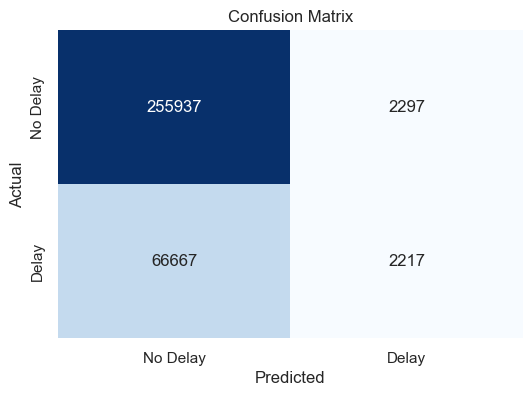

In [1550]:
plot_confusion_matrix(y_test, y_pred)

In [1551]:
y_pred_probs = classifier2.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (delay)

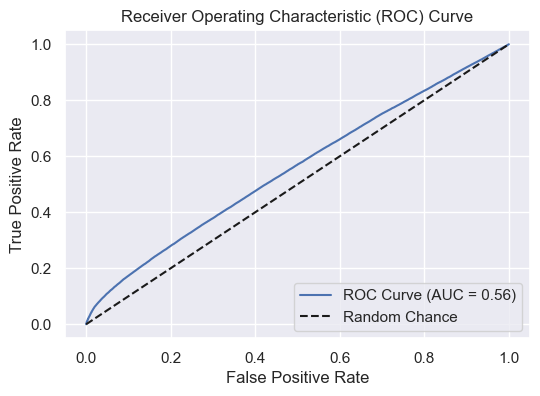

In [1552]:
plot_roc(y_test, y_pred_probs)

Perform the evaluaion as you have done with the previous model and plot/show the same metrics

Question: did you notice a difference by adding the extra data on the results?

### Key Observations

#### Confusion Matrix:

- **Model 1 (First Confusion Matrix):**
  - True Negatives (No Delay correctly classified as No Delay): **258,072**
  - False Positives (No Delay incorrectly classified as Delay): **162**
  - True Positives (Delay correctly classified as Delay): **195**
  - False Negatives (Delay incorrectly classified as No Delay): **68,689**

- **Model 2 (Second Confusion Matrix):**
  - True Negatives: **255,937**
  - False Positives: **2,297**
  - True Positives: **2,217**
  - False Negatives: **66,667**

**Difference:**

- **Model 2** correctly identifies more delays (higher True Positives) but also misclassifies more No Delays as Delays (higher False Positives).
- This trade-off suggests that **Model 2** is more sensitive to delay predictions, which can be useful if identifying delays is a higher priority.

#### ROC-AUC Score:

- **Model 1**: ROC-AUC of **0.63**
- **Model 2**: ROC-AUC of **0.56**

**Difference:**

- **Model 1** has a slightly better ROC-AUC score, meaning it has a better balance between sensitivity and specificity.
- **Model 2**, with a lower ROC-AUC, may be more affected by the additional data, especially if the weather variables don’t have a strong linear relationship with delay occurrences.

### Summary

- **Model 1** performs better in terms of overall balance and has a higher ROC-AUC.
- **Model 2** is more sensitive to identifying delays, as seen from the increase in True Positives but at the expense of a higher number of False Positives.
- The addition of extra data in **Model 2** provides some improvement in detecting delays but may require further tuning or feature selection to avoid reducing the model's overall discriminative power.



# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem. 
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account 
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the prblem statement.

In [1557]:
# copy the link here

## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
3. What were some of the biggest challenges you encountered throughout this project?
4. What were the three most important things you learned about machine learning while completing this project?

1. The model performance is on the right track but may not fully meet the business goal of accurately predicting flight delays. The current model may need more tuning, particularly in reducing false negatives (missed delays), as these are critical to customer satisfaction. If I had more time, I would:
   - **Experiment with Alternative Models**: Try more complex models, such as gradient boosting or deep learning methods, that may capture non-linear patterns better.
   - **Adjust the Decision Threshold**: Tuning the decision threshold could help increase sensitivity, thereby catching more delayed flights.
   - **Feature Engineering**: Incorporate additional features such as real-time weather data, seasonality patterns, or traffic congestion at airports, which are relevant to delay predictions.
   - **Hyperparameter Tuning**: Perform more extensive hyperparameter optimization using techniques like grid search or Bayesian optimization to improve model performance.

2. The model showed noticeable improvements with specific dataset adjustments, such as handling missing values and one-hot encoding categorical variables. Key techniques that significantly impacted model performance included:
   - **Data Cleaning**: Ensuring completeness and accuracy in the dataset was essential, as it removed biases introduced by missing values.
   - **One-Hot Encoding**: Encoding categorical variables, especially with many unique values like airline and origin/destination, helped the model recognize important categorical distinctions.
   - **Feature Selection**: Reducing less relevant features and focusing on those with a direct relationship to delays improved model interpretability and reduced overfitting.
   - **Addressing Class Imbalance**: Implementing techniques such as oversampling or using class weights helped the model pay more attention to minority classes (delayed flights), which improved recall and precision metrics.

3. The primary challenges included:
   - **Handling Imbalanced Data**: The dataset had far more on-time flights than delayed ones, leading to skewed predictions. Balancing this with oversampling techniques was necessary to improve model sensitivity.
   - **Feature Engineering**: Deciding which features to include and how to encode them required careful thought, as certain categorical variables (like airlines or airports) had high cardinality.
   - **Avoiding Overfitting**: It was challenging to maintain high performance on both training and test sets. The model tended to overfit on training data due to the number of features, which required regularization and validation techniques to counteract.
   - **Model Selection and Tuning**: Selecting the right model and hyperparameters required extensive experimentation, as some algorithms performed better with certain types of feature engineering than others.

4. The three most important things learned about machine learning while completing this project:
   - **The Importance of Data Preparation**: Quality data preprocessing is crucial. Even the best algorithms cannot compensate for poor data quality or irrelevant features.
   - **Balancing Evaluation Metrics**: Different metrics offer different insights into model performance, especially in imbalanced datasets. It’s essential to focus on metrics that align with business goals, such as precision and recall in delay prediction, rather than accuracy alone.
   - **Iterative Improvement**: Machine learning model development is an iterative process. It requires constant testing, tuning, and refining of features, algorithms, and hyperparameters to achieve the best results.
